# Pymaceuticals Inc.
---

### Analysis

From the review of the mice testing dataset, it shows that the almost an even amount of male and female mice were tested. There were more mice tested with drug regimens, Capomulin and Ramicane. The dataset may provide a better analysis if an even amount of mice were tested across all drug regimens.

Mice tested with Capomulin and Ramicane, appears to show a decrease in tumor volume over the course of the treatments.  There is also a positive correlation between tumor volume and weight for mice tested with Capomulin.   

From the sample of drug regimens reviewed, only the treatment with Infubinol has outliers. 

It would also be worth analyzing if the age has any effect on tumor volume during the course of treatment.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
mouse_study.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [3]:
mouse_study.shape

(1893, 8)

In [4]:
# Checking the number of mice.
mouse_study["Mouse ID"].nunique()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study[mouse_study.duplicated()]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study.loc[mouse_study["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study.drop(mouse_study[mouse_study["Mouse ID"] == "g989"].index, inplace=True)
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
mouse_study.shape

(1880, 8)

In [9]:
# Checking the number of mice in the clean DataFrame.
mouse_study["Mouse ID"].nunique()

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_vol = mouse_study.groupby(mouse_study["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_vol = mouse_study.groupby(mouse_study["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_vol_var = mouse_study.groupby(mouse_study["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_vol_std = mouse_study.groupby(mouse_study["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_vol_sem = mouse_study.groupby(mouse_study["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary = pd.DataFrame(
                        {
                            "Mean Tumor Volume": mean_tumor_vol,
                            "Median Tumor Volume": median_tumor_vol,
                            "Tumor Volume Variance": tumor_vol_var,
                            "Tumor Volume Std. Dev.": tumor_vol_std,
                            "Tumor Volume Std. Err.": tumor_vol_sem
                        }
)

summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

agg_summary = mouse_study.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)":["mean",
                                "median", "var", "std", "sem"]})
agg_summary


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

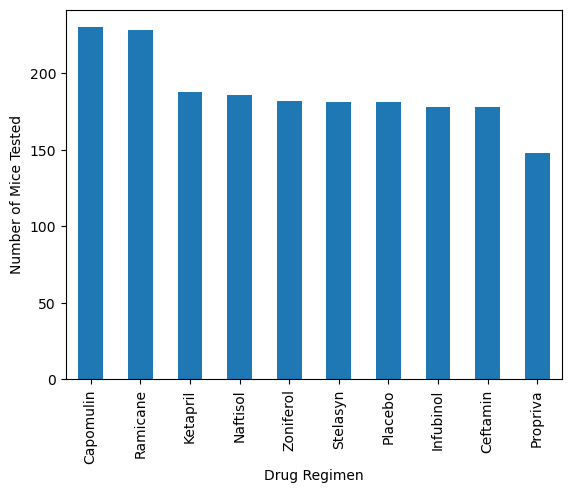

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

counts = mouse_study['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()


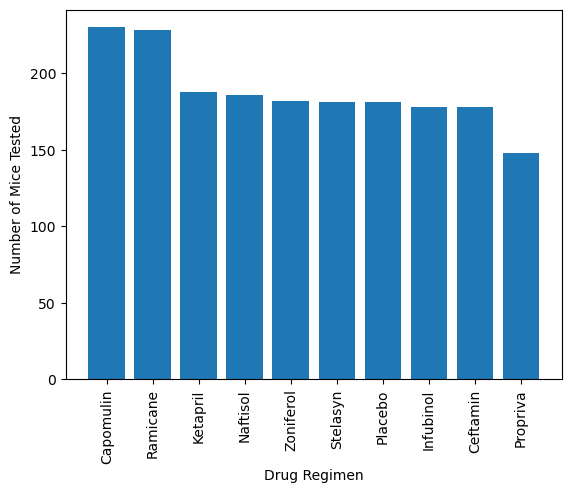

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

counts = mouse_study['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()


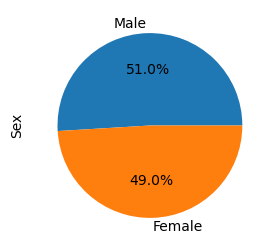

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mf = mouse_study["Sex"].value_counts().plot.pie(y="Sex", autopct= "%1.1f%%", figsize = (3,3))

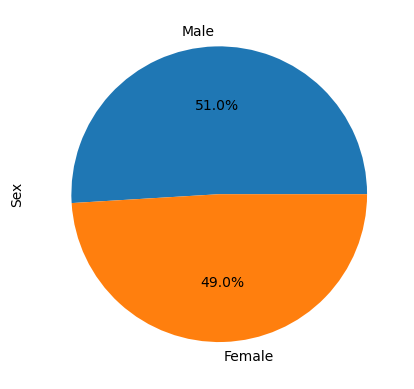

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counts = mouse_study["Sex"].value_counts()
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()



## Quartiles, Outliers and Boxplots

In [16]:
# # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp = mouse_study.groupby("Mouse ID").max()["Timepoint"]
last_tp.head()

last_tp = last_tp.reset_index()
last_tp.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_vol = pd.merge(last_tp, mouse_study, how="left", on = ["Timepoint", "Mouse ID"])
final_vol.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [17]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

vol_list = []

# Locate the rows which contain mice on each drug and get the tumor volumes

for drug in drug_list:
    tumor_vol = final_vol.loc[final_vol["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    vol_list.append(tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Determine outliers using upper and lower bounds

    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


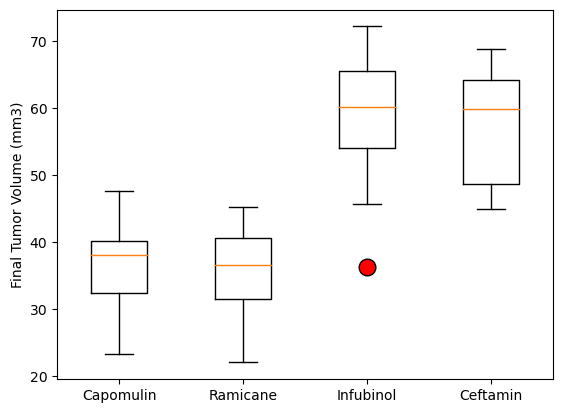

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outlier = dict(markerfacecolor='red',markersize=12)
plt.boxplot(vol_list, labels = drug_list,flierprops=outlier)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse b128')

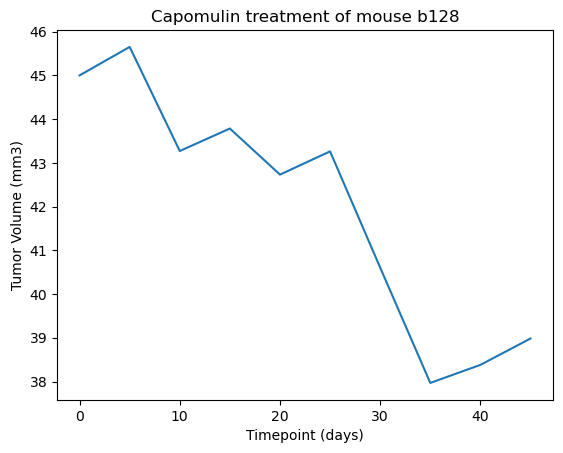

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_b128 = mouse_study.loc[mouse_study["Mouse ID"] == "b128"][["Timepoint","Tumor Volume (mm3)"]]
mouse_b128 = mouse_b128[["Timepoint", "Tumor Volume (mm3)"]].set_index("Timepoint")
mouse_b128 = mouse_b128.plot.line(legend=False)
mouse_b128.set_xlabel("Timepoint (days)")
mouse_b128.set_ylabel("Tumor Volume (mm3)")
mouse_b128.set_title("Capomulin treatment of mouse b128")


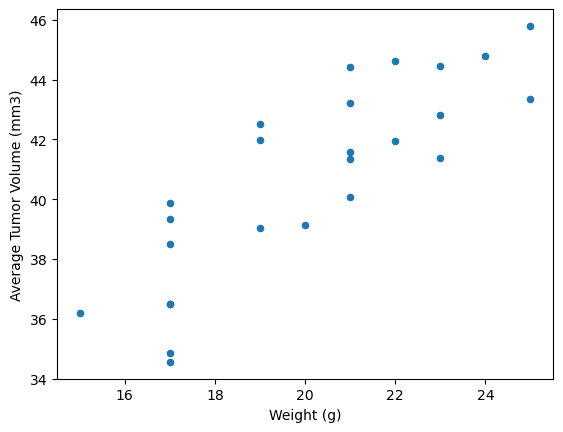

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_capomulin = mouse_study.loc[mouse_study["Drug Regimen"] == "Capomulin"]
mouse_capomulin = mouse_capomulin.groupby("Mouse ID").mean()
mouse_capomulin = mouse_capomulin.rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume (mm3)"})
mouse_capomulin_scatter = mouse_capomulin.plot.scatter(x="Weight (g)", y="Average Tumor Volume (mm3)")


## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = mouse_capomulin.corr()
corr

,Timepoint,Average Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Timepoint,1.000000,-0.116552,0.443939,-0.352502,-0.256449
Average Tumor Volume (mm3),-0.116552,1.000000,-0.099062,0.015190,0.841936
Metastatic Sites,0.443939,-0.099062,1.000000,-0.074090,-0.218440
Age_months,-0.352502,0.015190,-0.074090,1.000000,-0.074396
Weight (g),-0.256449,0.841936,-0.218440,-0.074396,1.000000


The correlation between mouse weight and the average tumor volume is 0.84


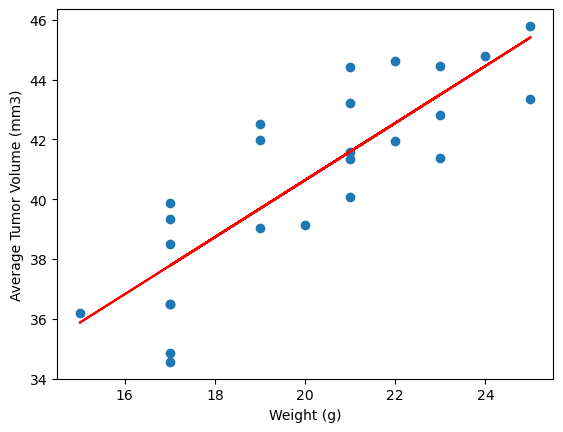

In [22]:
corr=round(st.pearsonr(mouse_capomulin['Weight (g)'],mouse_capomulin['Average Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(mouse_capomulin['Weight (g)'],mouse_capomulin['Average Tumor Volume (mm3)'])

y_values = mouse_capomulin['Weight (g)']*model[0]+model[1]
plt.scatter(mouse_capomulin['Weight (g)'],mouse_capomulin['Average Tumor Volume (mm3)'])
plt.plot(mouse_capomulin['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()